# A Beginner's Guide to Linear Regression with Python and Scikit-Learn (Sklearn)

Linear Regression is a fundamental algorithm in machine learning used extensively in predictive analytics. It is a supervised machine learning algorithm that is used to predict a continuous value. In this guide, we will learn how to implement linear regression using Python and the Scikit-Learn library. We will also learn how to evaluate the performance of the linear regression model and make predictions.

In [278]:
# Import the necessary libraries
import numpy as np
import pandas as pd
# Sklearn datasets library provides a few toy datasets to work with, one of which is the California housing dataset
from sklearn.datasets import fetch_california_housing
# Import the Linear Regression model from sklearn
from sklearn.linear_model import LinearRegression
# Import the train_test_split function from the model_selection module
from sklearn.model_selection import train_test_split
# Import the mean_squared_error, mean_absolute_error, and r2_score functions from the metrics module
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Import Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
# Set style and color palette
sns.set_theme(style='darkgrid', palette='mako')
# Change the setting and put it in a dictionary
plot_settings = {
    'font.family': 'calibri',
    'axes.titlesize': 18,
    'axes.labelsize': 14,
    'figure.dpi': 140,
    'axes.titlepad': 15,
    'axes.labelpad': 15,
    'figure.titlesize': 24,
    'figure.titleweight': 'bold',
}
# Use the dictionary variable to update the settings using matplotlib
plt.rcParams.update(plot_settings)

In [279]:
# Load the California Housing data set
data = fetch_california_housing()
# Display some information about the dataset
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [280]:
# Create a pandas DataFrame from the data
df = pd.DataFrame(data.data, columns=data.feature_names)
# Add the target variable to the DataFrame
df['target'] = data.target

In [281]:
# Check the first few rows of the DataFrame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


We will choose a feature we can use for simple linear regression then compare the performance with multiple linear regression. Let's plot the correlation between the features and the target variable to choose the feature we can use for simple linear regression. We will use `seaborn`, a popular data visualization library based on matplotlib, to plot the correlation matrix.

In [282]:
# Check the correlation between the features and the target variable
df.corr()['target'].sort_values()

Latitude     -0.144160
AveBedrms    -0.046701
Longitude    -0.045967
Population   -0.024650
AveOccup     -0.023737
HouseAge      0.105623
AveRooms      0.151948
MedInc        0.688075
target        1.000000
Name: target, dtype: float64

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0.5, 0, 'MedInc'),
  Text(1.5, 0, 'HouseAge'),
  Text(2.5, 0, 'AveRooms'),
  Text(3.5, 0, 'AveBedrms'),
  Text(4.5, 0, 'Population'),
  Text(5.5, 0, 'AveOccup'),
  Text(6.5, 0, 'Latitude'),
  Text(7.5, 0, 'Longitude'),
  Text(8.5, 0, 'target')])

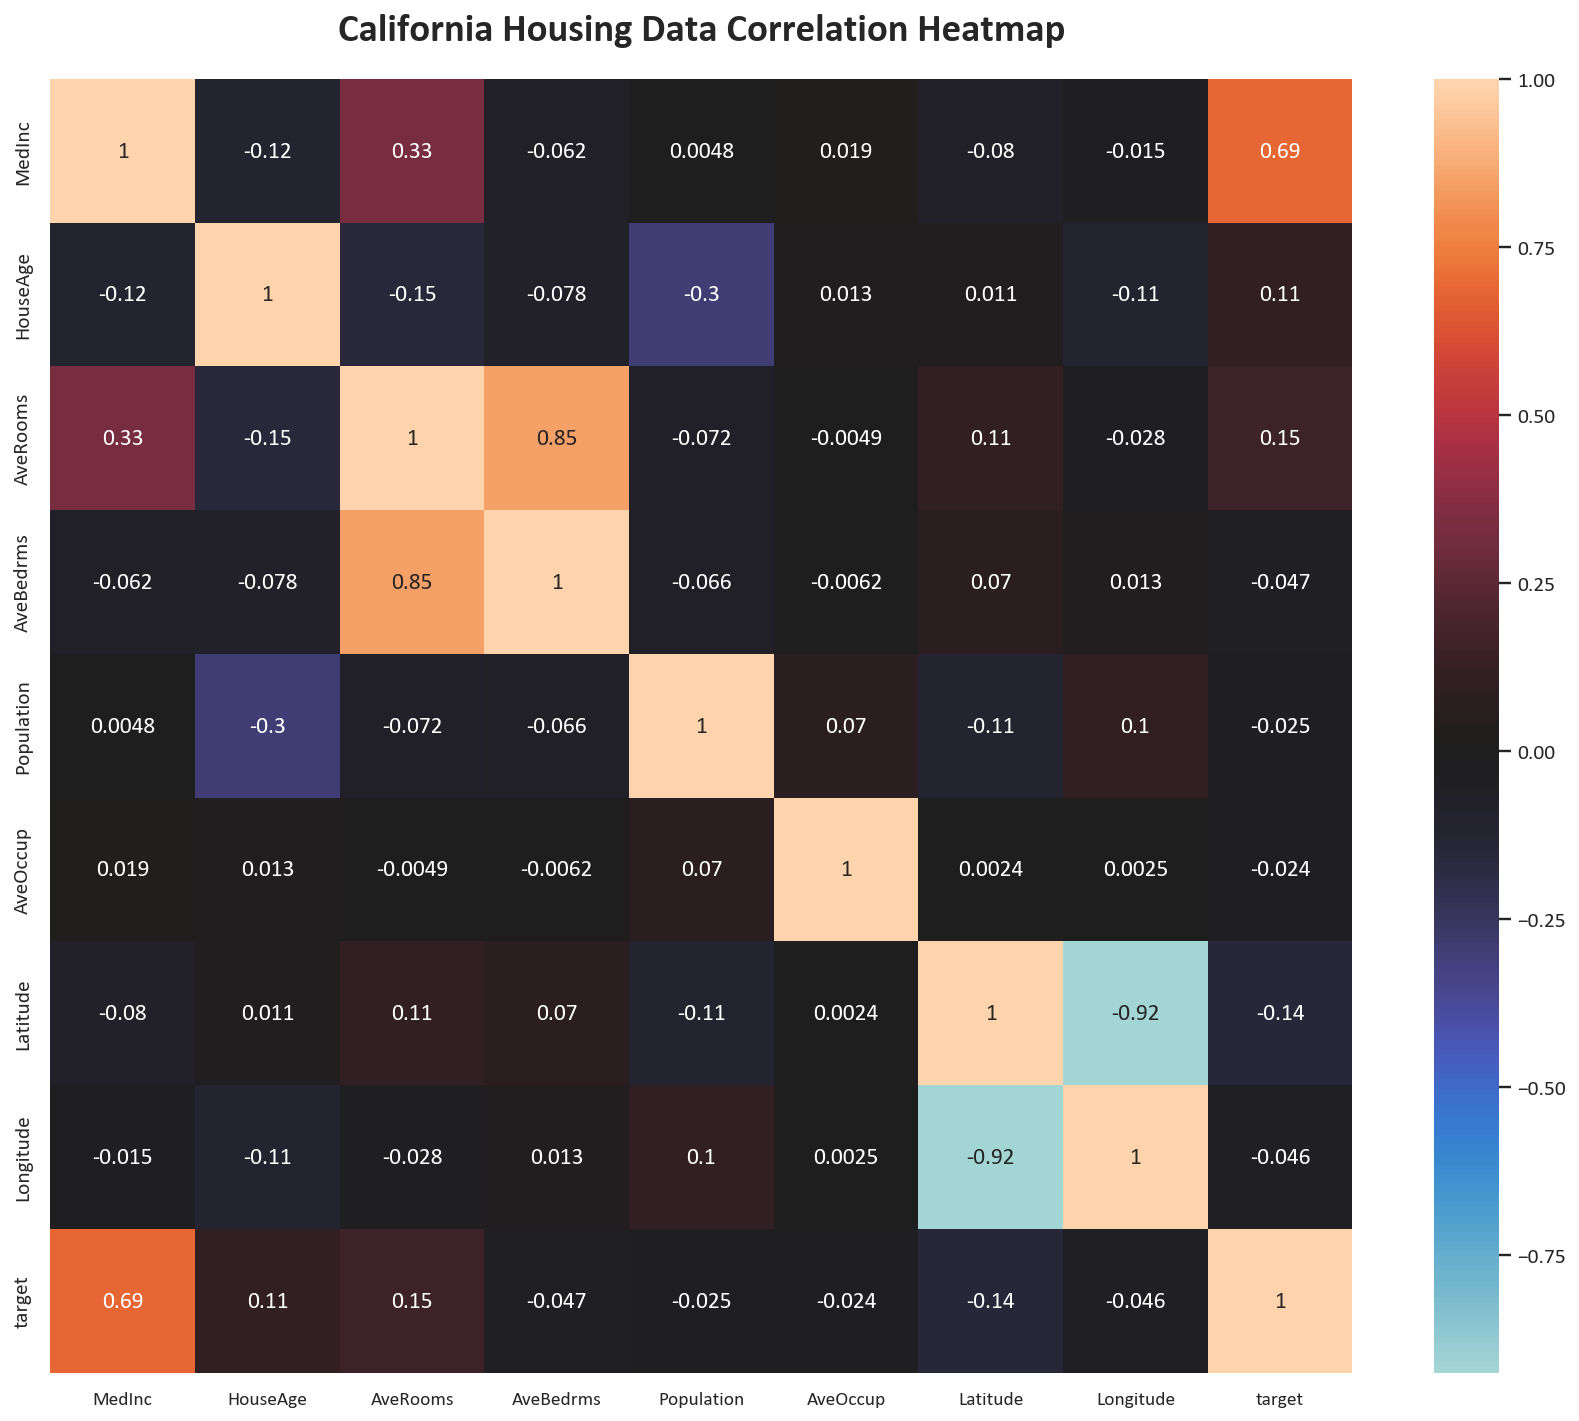

In [283]:
# Plot the correlation between the features and the target variable
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=True, center=0)
plt.title('California Housing Data Correlation Heatmap', fontsize=20, fontweight='bold', pad=20)
plt.xticks(fontsize=10)

As we can see, the feature MedInc has the highest correlation with the target variable, followed by AveRooms. We will use MedInc for simple linear regression and then use all the features for multiple linear regression.

Next, let's split the data into training and test sets. This is standard practice in machine learning to evaluate the performance of the model. We train the model on the training set and evaluate it on the test set. This helps us to estimate how well the model will generalize, or capture the underlying patterns, which allows it to make accurate predictions on new, unseen data. 

We will use the `train_test_split` function from Scikit-Learn:

In [284]:
# Split into training and testing sets with a ratio of 80% to 20%
X_train, X_test, y_train, y_test = train_test_split(df['MedInc'].values, df['target'].values, test_size=0.2, random_state=0)

In [285]:
# Reshape the training and testing sets, as the Linear Regression model expects a 2D array as input
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

Here, the train_test_split function splits the data into training and test sets, the first two parameters are the input data and target, which are X and y, respectively. The test_size parameter specifies the ratio of the test set, which is set to 0.2, meaning that 20% of the data will be used for testing and the remaining 80% for training. The random_state parameter sets a seed for the random number generator, which allows us to reproduce the results.

Next, let's train the linear regression model on the training data. We will use the `fit` method of the linear regression object and pass the training data as arguments:

In [286]:
# Create a Linear Regression model
simple_model = LinearRegression()
# Fit the model on the training data
simple_model.fit(X_train, y_train)
# Make predictions on the testing data
simple_predictions = simple_model.predict(X_test)

In this step, the linear regression model is trained on the training data. When we say "training" a machine learning model, it means teaching or feeding the algorithm with data so it can learn to make predictions on new, unseen data. In this case, our Linear Regression model is trying to find the best-fit line (the coefficients for the equation y = mx + c) that minimizes the sum of squared errors between the actual and predicted values in our training dataset.

The goal here is to minimize the residual sum of squares (RSS), which is the sum of the squared differences between the observed target variable `y_train` and the predicted target variable `ŷ`. The model will adjust its coefficients until it finds the best fit line that minimizes this RSS.

In other words, the Linear Regression algorithm tries to find a straight line (or plane in case of multiple features) that best fits your data by finding the optimal values for the slope (m) and y-intercept (c). This is done using the method of least squares, which aims to minimize the sum of the squared residuals or errors.

In [287]:
# Evaluate the model using the Root Mean Squared Error, Mean Absolute Error, and R2 Score
simple_rmse = np.sqrt(mean_squared_error(y_test, simple_predictions))
simple_mae = mean_absolute_error(y_test, simple_predictions)
simple_r2 = r2_score(y_test, simple_predictions)

# Print the evaluation metrics
print(f'Simple Linear Regression Model Metrics:')
print(f'RMSE: {simple_rmse:.4f}')
print(f'MAE: {simple_mae:.4f}')
print(f'R2 Score: {simple_r2:.4f}')

Simple Linear Regression Model Metrics:
RMSE: 0.8494
MAE: 0.6352
R2 Score: 0.4467


Next, let's evaluate the performance of the linear regression model. We will use three common evaluation metrics for regression problems:

Mean Absolute Error (MAE):- The Mean Absolute Error (MAE) is the average of the absolute differences between predictions and actual values. Its formula is given by:
MAE = Σ |y - ŷ| / n
Where y is the actual value, ŷ is the predicted value, and n is the number of samples. It measures the average magnitude of errors in a set of predictions, without considering their direction. This means that it gives equal weight to all errors, whether they are positive or negative. A smaller MAE indicates a better model. Here, an MAE of 0.64 indicates that, on average, the model's predictions are about $64,000 away from the actual value. This is a reasonable error for a simple linear regression model.

Root Mean Squared Error (RMSE):- The Root Mean Squared Error (RMSE) is the square root of the average of the squared differences between predictions and actual values. Its formula is given by:
RMSE = √(Σ (y - ŷ)² / n)
Where y is the actual value, ŷ is the predicted value, and n is the number of samples. RMSE is a quadratic scoring rule that also measures the average magnitude of errors. It gives more weight to large errors and is more sensitive to outliers than MAE. This allows RMSE to penalize large errors more heavily, which can be useful when training models on data with outliers. A smaller RMSE indicates a better model. An RMSE of 0.85 indicates that, on average, the root mean squared error of the model's predictions is about $85,000 away from the actual value.

R2 score, also known as the coefficient of determination:- The R2 score is a statistical measure that represents the proportion of the variance for the dependent variable that's explained by an independent variable or variables in a regression model. Its formula is given by:
R2 = 1 - (Σ (y - ŷ)² / Σ (y - ȳ)²)
Where y is the actual value, ŷ is the predicted value, and ȳ is the mean of the actual values. R2 score is a measure of how well the model performs relative to a simple mean of the target values. It provides an indication of the goodness of fit and how well future samples are likely to be predicted by the model. The best possible score is 1.0, with 0.0 indicating that the model is no better than predicting the mean of the target values, and negative values indicate that the model is worse than predicting the mean of the target values. A higher R2 score indicates a better model. An R2 score of 0.45 indicates that the model explains 45% of the variance in the target variable. As this is a linear model, it is expected to not be able to capture much variance in the target variable, which is why the R2 score is relatively low.

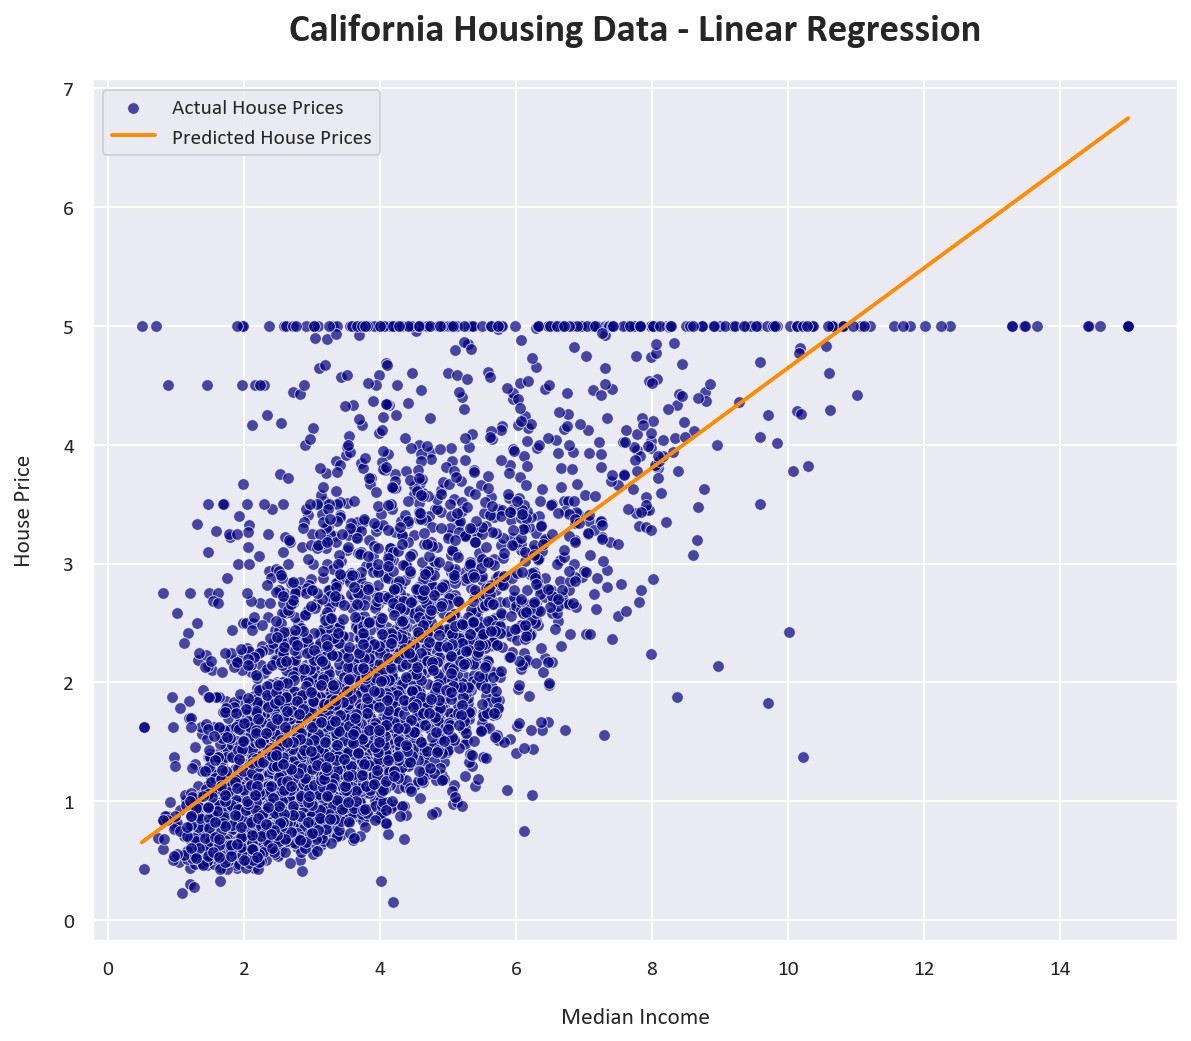

In [288]:
# Reshape the arrays to be 1-dimensional again, as the plot function expects 1D arrays
X_test = X_test.reshape(-1)
y_test = y_test.reshape(-1)

# Plot the test data along with the predictions
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_test, y=y_test, color='navy', label='Actual House Prices', alpha=0.7)
sns.lineplot(x=X_test, y=simple_predictions, color= 'darkorange', label='Predicted House Prices', linewidth=2)
plt.title('California Housing Data - Linear Regression', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Median Income', fontsize=12)
plt.ylabel('House Price', fontsize=12)
plt.legend()

Plotting the linear regression equation on top of the data points helps us visualize how well the model fits the data. We can see that the linear regression line captures the underlying pattern in the data, but it is not a perfect fit. This is expected, as linear regression is a simple model that assumes a linear relationship between the input and output variables. In practice, more complex models may be needed to capture the underlying patterns in the data.

In [289]:
# Print the regression equation
print('Regression Equation: y = {:.2f}x + {:.2f}'.format(simple_model.coef_[0], simple_model.intercept_))

Regression Equation: y = 0.42x + 0.44


The linear regression formula determined by the model is:

y = 0.42 * MedInc + 0.44

This means that for every unit increase in MedInc, the target variable (HousePrice) increases by 0.42. The y-intercept is 0.44, which means that if MedInc is 0, the predicted HousePrice will be 0.44.

Next, let's train a multiple linear regression model using all the features in the dataset. We will use the same steps as above, but this time we will pass all the features to the model:

In [290]:
# Train a multiple linear regression model using all the features
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=0)
# Create a Linear Regression model
multiple_model = LinearRegression()
# Fit the model on the training data
multiple_model.fit(X_train, y_train)
# Make predictions on the testing data
multiple_predictions = multiple_model.predict(X_test)

Next, let's evaluate the performance of the multiple linear regression model using the same evaluation metrics as above:

In [291]:
# Evaluate the model using the Root Mean Squared Error, Mean Absolute Error, and R2 Score
multiple_rmse = np.sqrt(mean_squared_error(y_test, multiple_predictions))
multiple_mae = mean_absolute_error(y_test, multiple_predictions)
multiple_r2 = r2_score(y_test, multiple_predictions)

# Print the evaluation metrics
print(f'Multiple Linear Regression Model Metrics:')
print(f'RMSE: {multiple_rmse:.4f}')
print(f'MAE: {multiple_mae:.4f}')
print(f'R2 Score: {multiple_r2:.4f}')

Multiple Linear Regression Model Metrics:
RMSE: 0.7273
MAE: 0.5351
R2 Score: 0.5943


As expected, the multiple linear regression model performs better than the simple linear regression model. The MAE, RMSE, are lower and the R2 score is higher, indicating that the model is better at capturing the underlying patterns in the data.

Plotting the actual vs predicted values for the multiple linear regression model shows that the model captures the underlying patterns in the data better than the simple linear regression model. The points are closer to the diagonal line, indicating that the model's predictions are closer to the actual values.

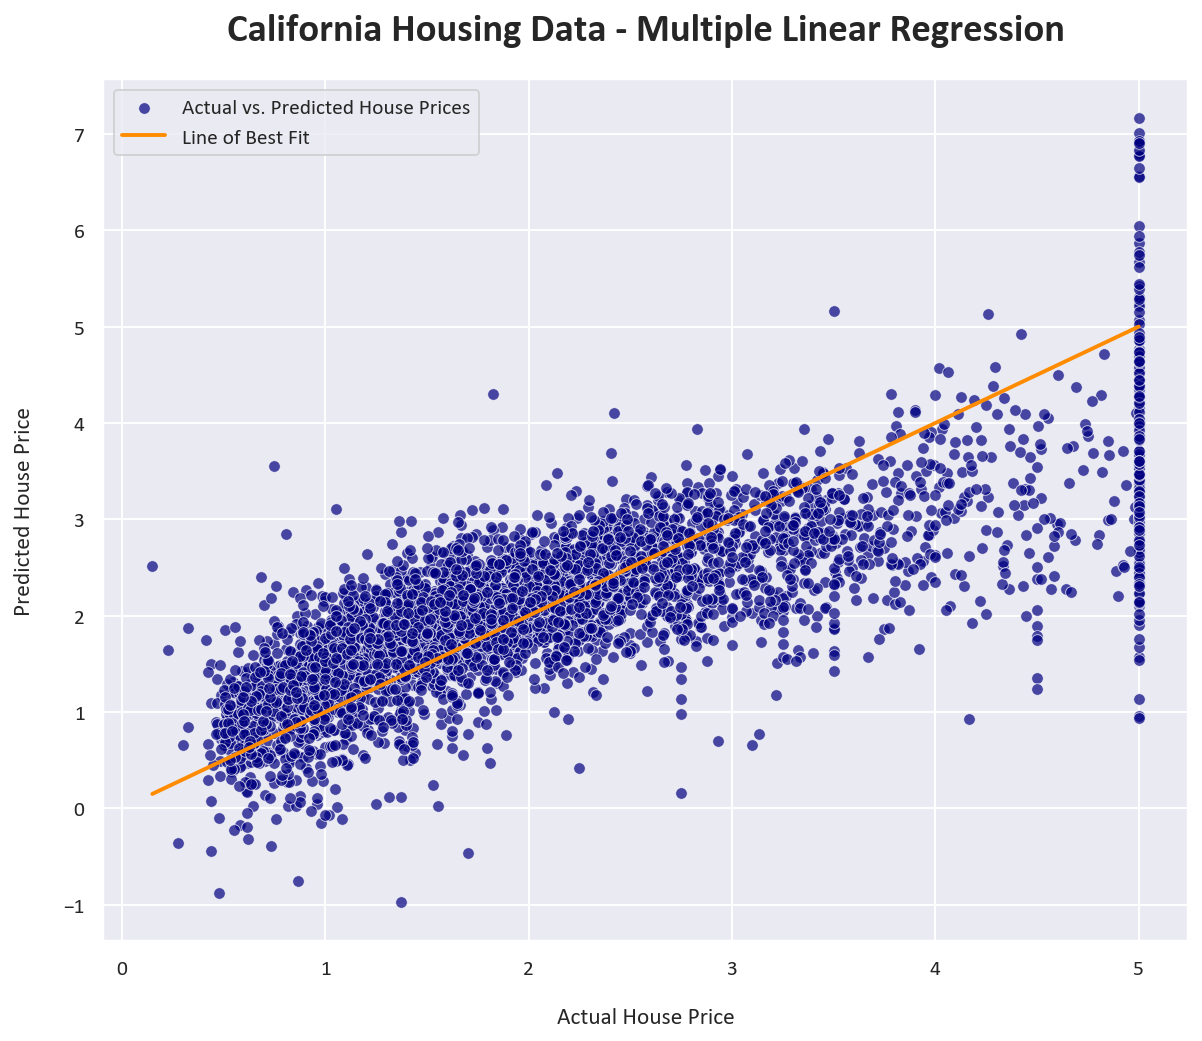

In [292]:
# Plot the test data along with the predictions
plt.figure(figsize=(10, 8))
# Plot the actual vs. predicted house prices
sns.scatterplot(x=y_test, y=multiple_predictions, color='navy', label='Actual vs. Predicted House Prices', alpha=0.7)
# Plot the line of best fit
sns.lineplot(x=y_test, y=y_test, color='darkorange', label='Line of Best Fit', linewidth=2)
plt.title('California Housing Data - Multiple Linear Regression', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Actual House Price', fontsize=12)
plt.ylabel('Predicted House Price', fontsize=12)
plt.legend()

In [293]:
# Print the regression equation
print('Regression Equation: y = {:.2f}x1 + {:.2f}x2 + {:.2f}x3 + {:.2f}x4 + {:.2f}x5 + {:.2f}x6 + {:.2f}x7 + {:.2f}x8 + {:.2f}'.format(multiple_model.coef_[0], multiple_model.coef_[1], multiple_model.coef_[2], multiple_model.coef_[3], multiple_model.coef_[4], multiple_model.coef_[5], multiple_model.coef_[6], multiple_model.coef_[7], multiple_model.intercept_))

Regression Equation: y = 0.43x1 + 0.01x2 + -0.10x3 + 0.59x4 + -0.00x5 + -0.00x6 + -0.42x7 + -0.43x8 + -36.86


In [294]:
# Check the model's feature names
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

The multiple linear regression formula determined by the model is:

y = 0.43 * MedInc + 0.01 * HouseAge - 0.10 * AveRooms + 0.59 * AveBedrms - 0.00 * Population - 0.00 * AveOccup - 0.42 * Latitude - 0.43 * Longitude - 36.86

Let's plot the feature importances of the multiple linear regression model. In this case, the feature importances are the coefficients of the linear regression model, which represent the importance of each feature in predicting the target variable. As with the formula above, we will use the `coef_` attribute of the linear regression object to get the feature importances:

Text(0, 0.5, 'Feature')

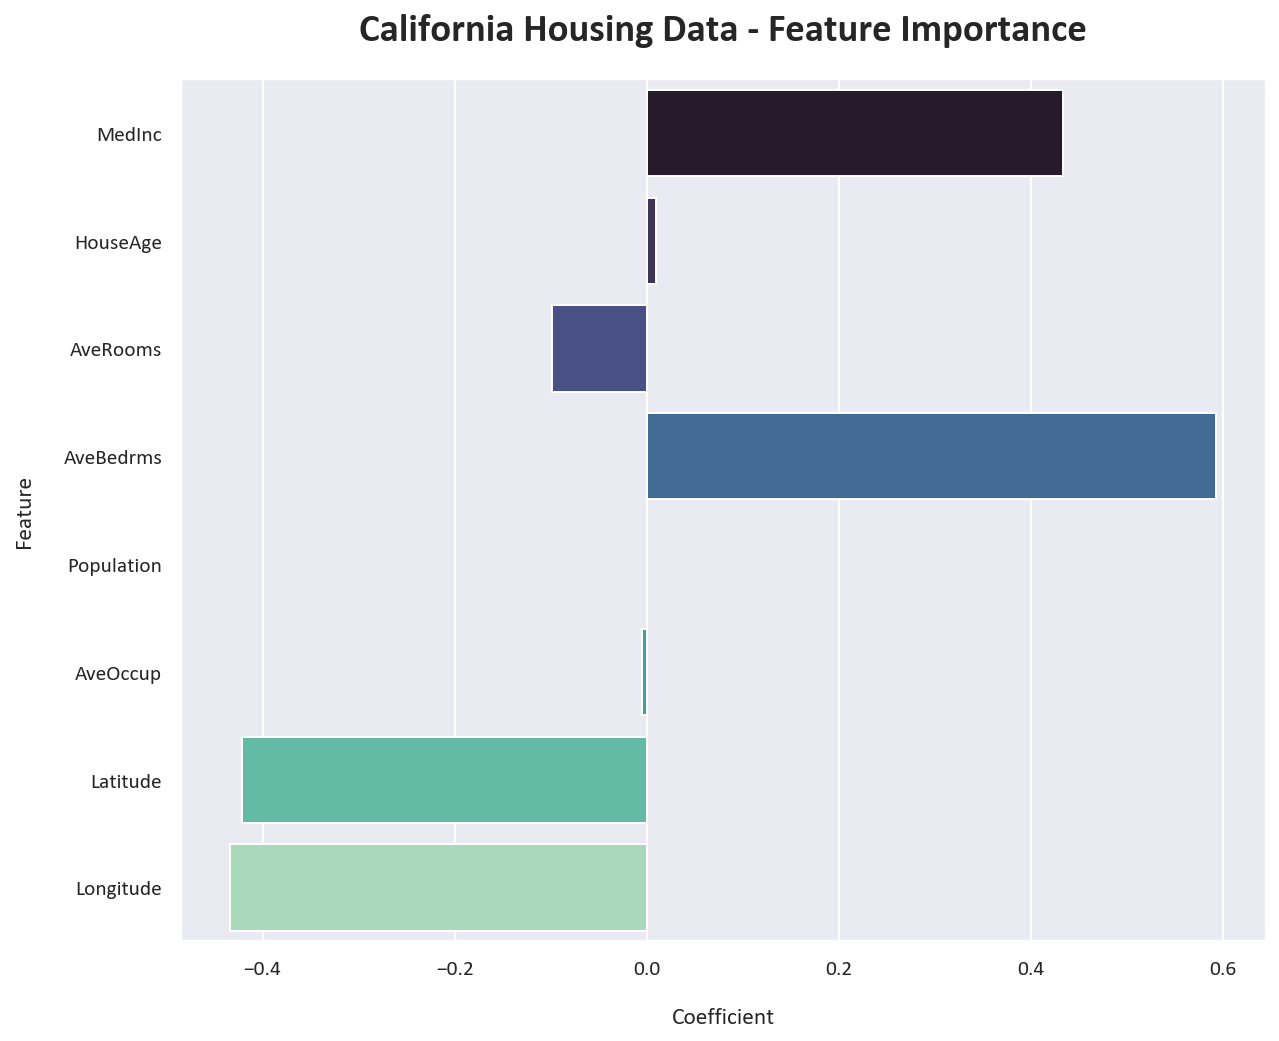

In [295]:
# Plot the feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x=multiple_model.coef_, y=df.drop('target', axis=1).columns, palette='mako', hue=df.drop('target', axis=1).columns)
plt.title('California Housing Data - Feature Importance', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Coefficient', fontsize=12)
plt.ylabel('Feature', fontsize=12)

Interestingly, the model determined that the number of bedrooms is more important than the median income in predicting house prices. This is contrary to our initial assumption that the median income would be the most important feature. This highlights the importance of training and evaluating machine learning models to understand the underlying patterns in the data. This also means that plain correlation analysis is not enough to determine the importance of features in a predictive model.